In [1]:
## Importing all Libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.model_selection import train_test_split


In [2]:
cereal_df=pd.read_csv('cereal.csv')
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193


In [4]:
df_sugar=cereal_df['sugars']
df_vitamin=cereal_df['vitamins']

In [5]:
print(df_sugar)

0      6
1      8
2      5
3      0
4      8
      ..
72     3
73    12
74     3
75     3
76     8
Name: sugars, Length: 77, dtype: int64


In [6]:
print(df_vitamin)

0     25
1      0
2     25
3     25
4     25
      ..
72    25
73    25
74    25
75    25
76    25
Name: vitamins, Length: 77, dtype: int64


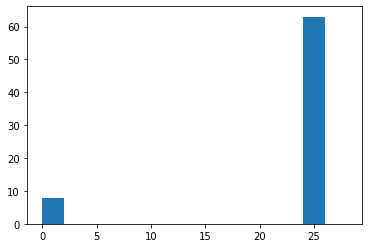

In [35]:
# %matplotlib inline
plt.hist(df_vitamin,rwidth=10,bins=[i for i in range(0,30,2)])
plt.show()

In [ ]:
plt.hist(df_sugar,rwidth=10,bins=[i for i in range(0,30,2)])
plt.show()

<AxesSubplot:xlabel='sugars', ylabel='Count'>

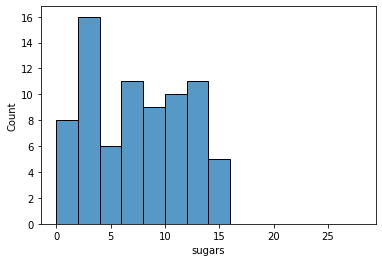

In [11]:
import seaborn as sns
sns.histplot(data=cereal_df, x="sugars",bins=[i for i in range(0,30,2)])


<AxesSubplot:xlabel='vitamins', ylabel='Count'>

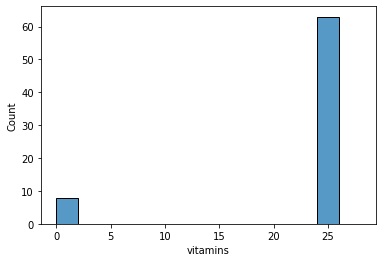

In [12]:
sns.histplot(data=cereal_df, x="vitamins",bins=[i for i in range(0,30,2)])

In [36]:
cereal_df['mfr'].unique()

array(['N', 'Q', 'K', 'R', 'G', 'P', 'A'], dtype=object)

In [39]:
def func_mapping(flag):
    if(flag=='N'):
        return 'Nabisco'
    elif(flag=='Q'):
        return 'Quaker Oats'
    elif(flag=='K'):
        return 'Kelloggs'
    elif(flag=='R'):
        return 'Raslston Purina'
    elif(flag=='G'):
        return 'Genaral Mills'
    elif(flag=='P'):
        return 'Posts'
    else:
        return 'American Home Foods Products'
    

In [40]:
cereal_df['Manufactor']=cereal_df['mfr'].apply(func_mapping)

In [41]:
cereal_df

,name,mfr,type,calories,protein,fat,sodium,fiber,carbo,sugars,potass,vitamins,shelf,weight,cups,rating,Manufactor
0,100% Bran,N,C,70,4,1,130,10.0,5.0,6,280,25,3,1.0,0.33,68.402973,Nabisco
1,100% Natural Bran,Q,C,120,3,5,15,2.0,8.0,8,135,0,3,1.0,1.00,33.983679,Quaker Oats
2,All-Bran,K,C,70,4,1,260,9.0,7.0,5,320,25,3,1.0,0.33,59.425505,Kelloggs
3,All-Bran with Extra Fiber,K,C,50,4,0,140,14.0,8.0,0,330,25,3,1.0,0.50,93.704912,Kelloggs
4,Almond Delight,R,C,110,2,2,200,1.0,14.0,8,-1,25,3,1.0,0.75,34.384843,Raslston Purina
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
72,Triples,G,C,110,2,1,250,0.0,21.0,3,60,25,3,1.0,0.75,39.106174,Genaral Mills
73,Trix,G,C,110,1,1,140,0.0,13.0,12,25,25,2,1.0,1.00,27.753301,Genaral Mills
74,Wheat Chex,R,C,100,3,1,230,3.0,17.0,3,115,25,1,1.0,0.67,49.787445,Raslston Purina
75,Wheaties,G,C,100,3,1,200,3.0,17.0,3,110,25,1,1.0,1.00,51.592193,Genaral Mills


(array([ 6.,  8.,  0., 23.,  0.,  8., 22.,  0.,  9.,  1.]),
 array([0. , 0.6, 1.2, 1.8, 2.4, 3. , 3.6, 4.2, 4.8, 5.4, 6. ]),
 <BarContainer object of 10 artists>)

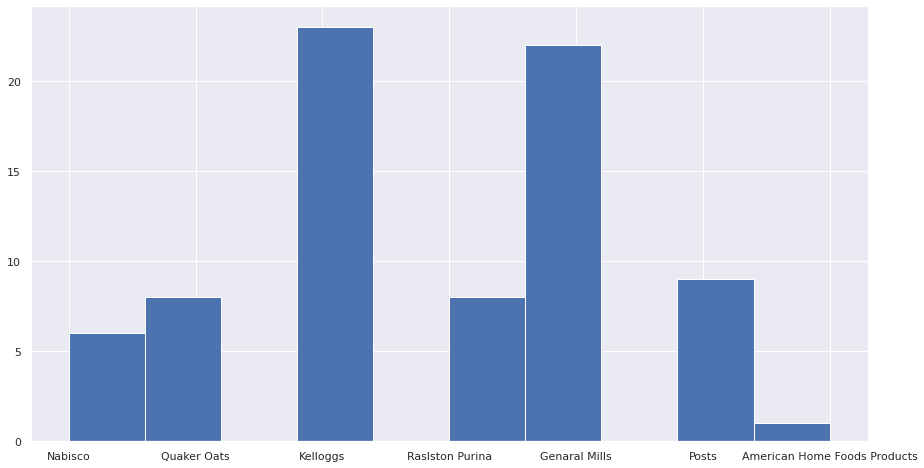

In [54]:
plt.hist(data=cereal_df,x='Manufactor')

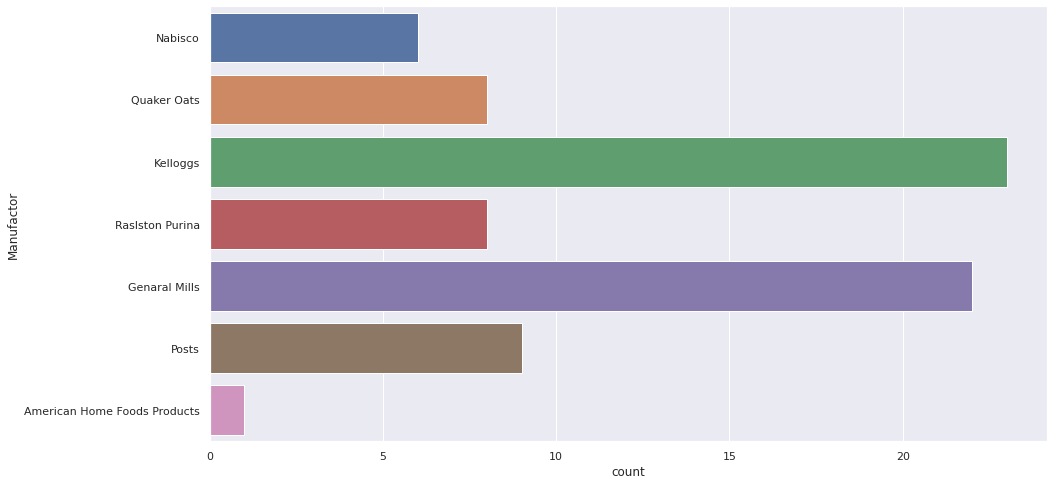

In [55]:
sns.set(rc={"figure.figsize":(15,8)})
sns.countplot(y ='Manufactor', data = cereal_df)
# Show the plot
plt.show()

In [56]:
cereal_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 77 entries, 0 to 76
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   name        77 non-null     object 
 1   mfr         77 non-null     object 
 2   type        77 non-null     object 
 3   calories    77 non-null     int64  
 4   protein     77 non-null     int64  
 5   fat         77 non-null     int64  
 6   sodium      77 non-null     int64  
 7   fiber       77 non-null     float64
 8   carbo       77 non-null     float64
 9   sugars      77 non-null     int64  
 10  potass      77 non-null     int64  
 11  vitamins    77 non-null     int64  
 12  shelf       77 non-null     int64  
 13  weight      77 non-null     float64
 14  cups        77 non-null     float64
 15  rating      77 non-null     float64
 16  Manufactor  77 non-null     object 
dtypes: float64(5), int64(8), object(4)
memory usage: 10.4+ KB


In [57]:
cereal_df.columns    

Index(['name', 'mfr', 'type', 'calories', 'protein', 'fat', 'sodium', 'fiber',
       'carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups',
       'rating', 'Manufactor'],
      dtype='object')

In [59]:
x=cereal_df[['calories', 'protein', 'fat', 'sodium', 'fiber','carbo', 'sugars', 'potass', 'vitamins', 'shelf', 'weight', 'cups']]
y=cereal_df['rating']

In [60]:
X_train,X_test,Y_train,Y_test=train_test_split(x,y,test_size=0.25)

In [61]:
X_train.shape

(57, 12)

In [62]:
X_test.shape

(20, 12)

In [63]:
lr=LinearRegression()
lr.fit(X_train,Y_train)

LinearRegression()

In [64]:
lr.coef_

array([-2.22724158e-01,  3.27317381e+00, -1.69140802e+00, -5.44927019e-02,
        3.44347981e+00,  1.09245091e+00, -7.24895178e-01, -3.39933507e-02,
       -5.12119714e-02, -1.05844213e-08, -2.09457676e-07,  4.18222336e-07])

In [65]:
lr.intercept_

54.92718409643738

In [66]:
y_predicted=lr.predict(X_test)

In [67]:
y_predicted

array([59.36399349, 63.00564547, 30.45084337, 55.3331418 , 45.86332459,
       38.83974529, 93.7049127 , 32.20758145, 59.64283677, 41.0154918 ,
       23.80404305, 53.31381301, 50.82839247, 35.2524435 , 74.4729488 ,
       50.76499908, 41.50353987, 39.2411145 , 40.56015894, 33.98367921])

In [70]:
from sklearn.metrics import mean_squared_error,r2_score
r2=r2_score(Y_test,y_predicted)
r2

0.9999999999999993